[Reference](https://towardsdatascience.com/3-unique-charts-created-with-matplotlib-you-probably-havent-seen-before-421ab8cdd36f)

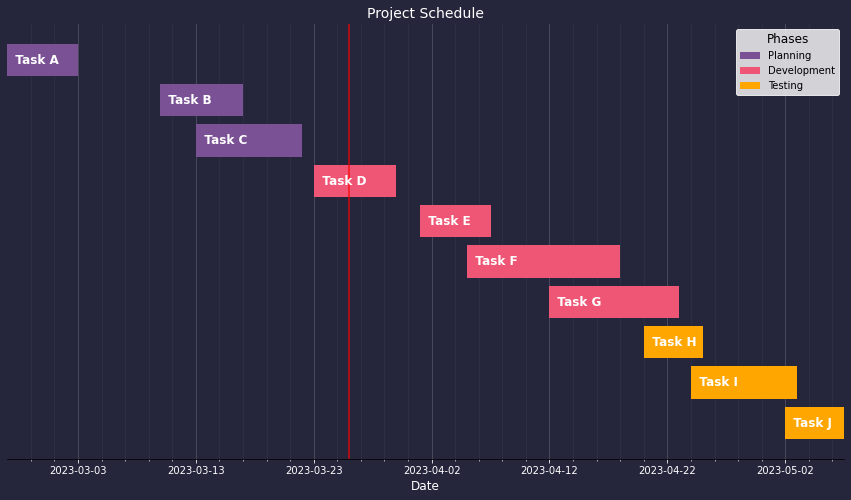

In [1]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import datestr2num, DateFormatter, DayLocator
from matplotlib.ticker import AutoMinorLocator
from matplotlib.patches import Patch

# Create dummy date
tasks = ['Task A', 'Task B', 'Task C', 'Task D', 'Task E', 'Task F', 'Task G', 'Task H', 'Task I', 'Task J']
start_dates = ['2023-02-25', '2023-03-10', '2023-03-13', '2023-03-23', '2023-04-01', '2023-04-05', '2023-04-12', '2023-04-20', '2023-04-24', '2023-05-02']
end_dates = ['2023-03-03', '2023-03-17', '2023-03-22', '2023-03-30', '2023-04-07', '2023-04-18', '2023-04-23', '2023-04-25', '2023-05-03', '2023-05-07']

# Setup the dates and calculate durations
start_dates = [datestr2num(d) for d in start_dates]
end_dates = [datestr2num(d) for d in end_dates]

durations = [(end - start) for start, end in zip(start_dates, end_dates)]

fig, ax = plt.subplots(figsize=(15, 8), facecolor='#25253c')

ax.set_facecolor('#25253c')

# Create colours for each task based on categories
colors = ['#7a5195', '#ef5675', '#ffa600'] 
task_colors = [colors[0]] * 3 + [colors[1]] * 4 + [colors[2]] * 3

# Display the bars
ax.barh(y=tasks, width=durations, left=start_dates, 
height=0.8, color=task_colors)

ax.invert_yaxis()

# Setup the x axis labels
ax.set_xlim(start_dates[0], end_dates[-1])

date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(DayLocator(interval=10))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(axis='x', which='minor', length=2, color='white', labelsize=6)

ax.get_yaxis().set_visible(False)

# Control the colour of the grid for major and minor lines
ax.grid(True, axis='x', linestyle='-', color='#FFFFFF', alpha=0.2, which='major')
ax.grid(True, axis='x', linestyle='-', color='#FFFFFF', alpha=0.05, which='minor')
ax.set_axisbelow(True)

# Add labels for each task. For padding, we can use an f-string and add some extra space
for i, task in enumerate(tasks):
    ax.text(start_dates[i], i, f'  {task}', ha='left', va='center', color='white', fontsize=12, fontweight='bold')

# Add the current date line
today = datetime.datetime.now().strftime("%Y-%m-%d")
today_num = datestr2num(today)
ax.axvline(today_num, color='red', alpha=0.8)

# Style ticks, labels and colours
ax.tick_params(axis='both', colors='white')

ax.set_xlabel('Date', color='white', fontsize=12)
ax.set_title('Project Schedule', color='white', fontsize=14)

# Hide spines so only bottom is visible
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create a list of custom patches for the legend
legend_elements = [
    Patch(facecolor=colors[0], label='Planning'),
    Patch(facecolor=colors[1], label='Development'),
    Patch(facecolor=colors[2], label='Testing'),
]

# Add the legend in the top right corner of the plot
ax.legend(handles=legend_elements, loc='upper right', 
          facecolor='white', 
          edgecolor='white', 
          fontsize=10, title='Phases', title_fontsize=12, frameon=True)

plt.show()

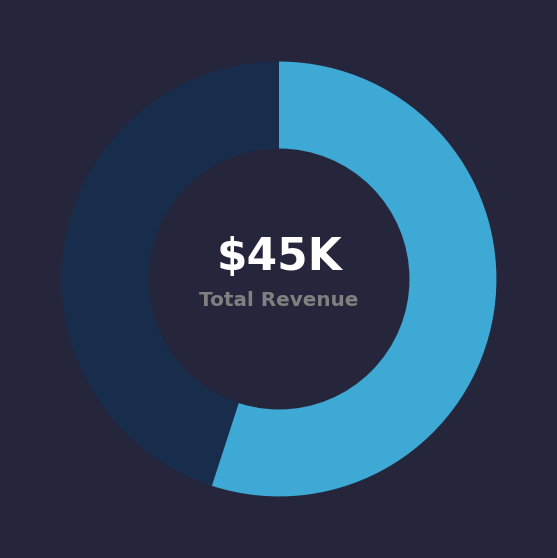

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

actual_value = 45
target_value = 120
remaining_value = target_value - actual_value

colours = ['#3da9d4', '#063b63']

fig = plt.figure(figsize=(10,10), facecolor='#25253c')
ax = fig.add_subplot(1,1,1)

pie = ax.pie([55, 45], 
        colors=colours, 
        startangle=90, 
        labeldistance=1.15, 
        counterclock=False)

# Set the alpha of segment 2
pie[0][1].set_alpha(0.4)

# Add inner circle and text
centre_circle = plt.Circle((0, 0), 0.6, fc='#25253c')

# Adding the circles to the chart
fig.gca().add_artist(centre_circle)

# Adding text to the centre of the chart
centre_text = f'${actual_value}K'
centre_text_line_2 = f'Total Revenue'

ax.text(0,0.1, centre_text, horizontalalignment='center', 
            verticalalignment='center', 
            fontsize=44, fontweight='bold',
            color='white')
ax.text(0,-0.1, centre_text_line_2, horizontalalignment='center', 
            verticalalignment='center', 
            fontsize=20, fontweight='bold',
            color='grey')

plt.show()

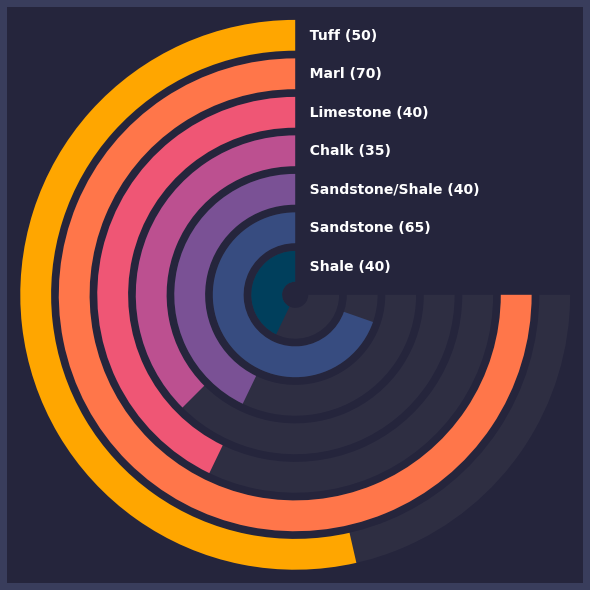

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

lith_dict = {'LITH': ['Shale', 'Sandstone', 
                      'Sandstone/Shale', 'Chalk', 
                      'Limestone', 'Marl', 'Tuff'],
             'PERCENTAGE': [40,65, 40, 35, 
                            40, 70, 50]}

df = pd.DataFrame.from_dict(lith_dict)

max_value_full_ring = max(df['PERCENTAGE'])

ring_colours = ['#003f5c', '#374c80', '#7a5195','#bc5090',
               '#ef5675','#ff764a','#ffa600']

ring_labels =  [f'   {x} ({v}) ' for x, v in zip(list(df['LITH']), 
                                                 list(df['PERCENTAGE']))]
data_len = len(df)

fig = plt.figure(figsize=(10,10), facecolor='#393d5c')

rect = [0.1,0.1,0.8,0.8]

# Add axis for chart background
ax_cart = fig.add_axes(rect, facecolor='#25253c')
ax_cart.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
ax_cart.tick_params(axis='both', left=False, bottom=False, 
                   labelbottom=False, labelleft=False)

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)

# Loop through each entry in the dataframe and plot a grey
# ring to create the background for each one
for i in range(data_len):
    ax_polar_bg.barh(i, max_value_full_ring*1.5*np.pi/max_value_full_ring, 
                     color='grey', 
                     alpha=0.1)
# Hide all axis items
ax_polar_bg.axis('off')
    
# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0, 1, 2, 3, 4, 5, 6], 
                    labels=ring_labels, 
                    angle=0, 
                    fontsize=14, fontweight='bold',
                    color='white', verticalalignment='center')

# Loop through each entry in the dataframe and create a coloured 
# ring for each entry
for i in range(data_len):
    ax_polar.barh(i, list(df['PERCENTAGE'])[i]*1.5*np.pi/max_value_full_ring, 
                  color=ring_colours[i])

# Hide all grid elements for the    
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=False, bottom=False, 
                   labelbottom=False, labelleft=True)

plt.show()